In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
SEED = 1234
NUM_SAMPLES = 50

In [ ]:
np.random.seed(SEED)

In [ ]:
# Generate synthetic data
def generate_data(num_samples):
    """Generate dummy data for linear regression."""
    x = np.array(range(num_samples))
    random_noise = np.random.uniform(-10, 20, size=num_samples)
    y = 3.5 * x + random_noise
    return x, y

In [ ]:
# Generate random data
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print(data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [ ]:
df = pd.DataFrame(data, columns=['X', 'y'])
X = df[['X']].values
y = df[['y']].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


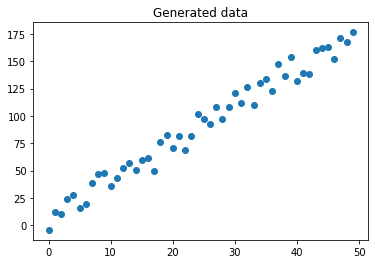

In [ ]:
# scatter plot
plt.title("Generated data")
plt.scatter(x=df['X'], y=df['y'])
plt.show()

In [ ]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [ ]:
# shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [ ]:
# split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [ ]:
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = X[test_start:]

In [ ]:
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


In [ ]:
def standardize_data(data, mean, std):
    return (data - mean) / std

In [ ]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [ ]:
# Standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [ ]:
# Check (means should be ~0 and std should be ~1)
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.6, std: 0.9
mean: -1.6, std: 0.3


In [ ]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = y_train.shape[1]

In [ ]:
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))

print(f"W: {W.shape}")
print(f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


In [ ]:
y_pred = np.dot(X_train, W) + b
print(f"y_pred: {y_pred.shape}")

y_pred: (35, 1)


In [ ]:
# loss
N = len(y_train)
loss = (1/N) * np.sum((y_train-y_pred)**2)
print(f"loss: {loss:.2f}")

loss: 0.99


In [ ]:
# backprop
dW = -(2/N) * np.sum((y_train - y_pred)*X_train)
db = -(2/N) * np.sum((y_train - y_pred)*1)

In [ ]:
LEARNING_RATE = 1e-1

In [ ]:
# update weights
W += LEARNING_RATE * dW
b += LEARNING_RATE * db

In [ ]:
NUM_EPOCHS = 100

In [ ]:
# intialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

In [ ]:
for epoch_num in range(NUM_EPOCHS):
    
    # forward pass
    y_pred = np.dot(X_train, W) + b

    # loss
    loss = (1/len(y_train)) * np.sum((y_train-y_pred)**2)

    # progress
    if epoch_num % 10 == 0:
        print(f"Epoch: {epoch_num}, loss: {loss: .3f}")

    # backprop
    dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
    db = -(2/N) * np.sum((y_train - y_pred) * 1)

    # update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db

Epoch: 0, loss:  0.990
Epoch: 10, loss:  0.039
Epoch: 20, loss:  0.028
Epoch: 30, loss:  0.028
Epoch: 40, loss:  0.028
Epoch: 50, loss:  0.028
Epoch: 60, loss:  0.028
Epoch: 70, loss:  0.028
Epoch: 80, loss:  0.028
Epoch: 90, loss:  0.028


In [ ]:
# Predictions
pred_train = W*X_train + b
pred_test = W*X_test + b

In [ ]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.03, test_MSE: 1.47


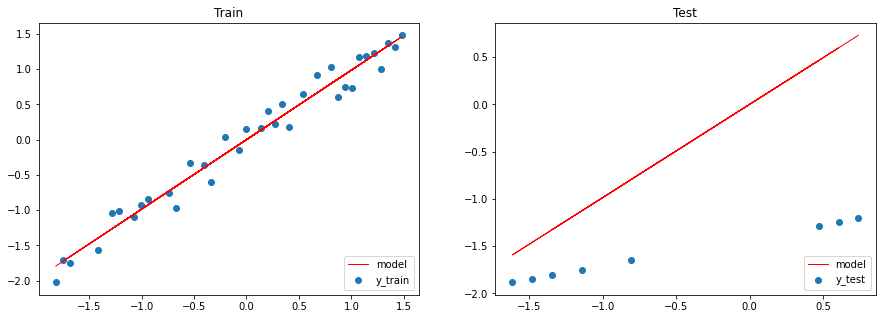

In [ ]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label='y_train')
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Show plots
plt.show()

In [ ]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}")

[actual] y = 3.5X + noise
[model] y_hat = 3.4X + 7.8
